# What is the trade-off of resizing? If you shrink an image of a crowded street too much to make it faster, what critical information might you lose?

### Answer:
Resizing an image, particularly shrinking it to reduce computational cost and improve processing speed, involves a trade-off between efficiency and accuracy. When an image of a crowded street is reduced too much in size, a significant amount of fine-grained detail is lost due to downsampling. Critical information such as small objects, facial features, license plate numbers, or subtle textures that may be essential for tasks like object detection, surveillance, or recognition can become blurred or completely indistinguishable. In extreme cases, multiple distinct objects may merge into a single pixel cluster, leading to misinterpretation or missed detections. Thus, while shrinking images improves speed and reduces memory usage, it sacrifices spatial resolution and feature richness, which directly impacts the performance and reliability of computer vision models that depend on these fine details.


# When would grayscaling be a bad idea? Name a detection task where color is the most important feature. (e.g., identifying traffic light status, sorting ripe vs. unripe fruit).

### Answer
Grayscaling, while useful for reducing computational complexity and focusing on shape and texture, can be a poor choice in tasks where color itself carries the most significant information for detection or classification. For example, in the case of identifying the status of a traffic light, the distinction between red, yellow, and green is purely based on color differences, and converting the image to grayscale would eliminate this critical feature, making accurate recognition nearly impossible. Similarly, in applications like sorting ripe versus unripe fruit, where ripeness is indicated by color changes such as green to yellow or red, grayscaling would remove this essential clue and lead to incorrect classification. Therefore, grayscaling is a bad idea when the primary discriminative factor is color rather than shape, texture, or intensity.


# Blurring intentionally destroys information. Imagine you are building a system to read license plates from a security camera. How could blurring be helpful? How could it be harmful if you apply too much?


### Answer
Blurring is a technique that deliberately reduces sharpness and fine detail in an image, and its usefulness or harm depends on the context of the task. In a license plate recognition system, a mild level of blurring can be helpful to suppress background noise, remove irrelevant textures, or reduce the impact of lighting variations such as glare and reflections, thereby making the plate characters more distinct for subsequent processing. However, if blurring is applied excessively, it destroys the very fine details that are crucial for accurately distinguishing letters and numbers on the plate. This can cause characters to merge, edges to disappear, and the plate to become unreadable, ultimately leading to errors in recognition. Hence, while controlled blurring can enhance performance by emphasizing important features and reducing distractions, over-blurring critically harms the system by erasing the essential details needed for correct identification.


In [38]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


In [39]:
print("Downloading YOLOv3 files...")
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov3.weights
!wget https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
!wget https://github.com/pjreddie/darknet/raw/master/data/coco.names
print("Download complete.")


--2025-08-28 12:26:40--  https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov3.weights
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/75388965/e42c2500-9016-11ea-92ba-11df9f79f31b?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-28T13%3A22%3A22Z&rscd=attachment%3B+filename%3Dyolov3.weights&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-28T12%3A22%3A10Z&ske=2025-08-28T13%3A22%3A22Z&sks=b&skv=2018-11-09&sig=YmVfKdGYM8KTkTtZEF68EZvqi3fhboPP3dItukhZxq0%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NjM4NDE4NCwibmJmIjoxNzU2MzgzODg0LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHV

In [40]:
weights_path = "yolov3.weights"
cfg_path = "yolov3.cfg"
names_path = "coco.names"

if os.path.exists(weights_path + ".1"):
    os.rename(weights_path + ".1", weights_path)
if os.path.exists(cfg_path + ".1"):
    os.rename(cfg_path + ".1", cfg_path)
if os.path.exists(names_path + ".1"):
    os.rename(names_path + ".1", names_path)


In [41]:
print("Loading class names...")
def load_names(names_path):
    with open(names_path, "r") as f:
        return [c.strip() for c in f.readlines()]

classes = load_names(names_path)
print(f"Loaded {len(classes)} class names.")


Loading class names...
Loaded 80 class names.


In [42]:
print("Loading YOLOv3 network...")
net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)
print("YOLOv3 network loaded successfully.")

net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
print("Using CPU backend.")


Loading YOLOv3 network...
YOLOv3 network loaded successfully.
Using CPU backend.


In [43]:
def get_output_layer_names(net):
    layer_names = net.getLayerNames()
    output_layers = []
    for i in net.getUnconnectedOutLayers():
        if isinstance(i, list):
            output_layers.append(layer_names[i[0] - 1])
        else:
            output_layers.append(layer_names[i - 1])
    return output_layers

output_layers = get_output_layer_names(net)


In [44]:
image_path = "/content/ad09300d-cd0d-4809-85a6-65b463797ad5.jpg"

print(f"Loading image: {image_path}")
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Image not found at {image_path}. Please upload the image or change the path.")
    exit()

h, w = img.shape[:2]
print(f"Image loaded with dimensions: {w}x{h}")


Loading image: /content/ad09300d-cd0d-4809-85a6-65b463797ad5.jpg
Image loaded with dimensions: 1280x720


In [45]:
input_size = 608
blob = cv2.dnn.blobFromImage(img, 1/255.0, (input_size, input_size), swapRB=True, crop=False)
net.setInput(blob)

print("Performing forward pass...")
outputs = net.forward(output_layers)
print("Forward pass complete.")


Performing forward pass...
Forward pass complete.


In [46]:
boxes, confidences, class_ids = [], [], []
conf_thresh = 0.2

for out in outputs:
    for det in out:
        scores = det[5:]
        class_id = int(np.argmax(scores))
        conf = float(scores[class_id])

        if conf > conf_thresh:
            cx, cy, bw, bh = det[:4] * np.array([w, h, w, h])
            x, y = int(cx - bw/2), int(cy - bh/2)

            boxes.append([x, y, int(bw), int(bh)])
            confidences.append(conf)
            class_ids.append(class_id)

nms_thresh = 0.4
print(f"Found {len(boxes)} raw detections. Applying NMS...")
idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_thresh, nms_thresh)
print(f"After NMS, {len(idxs)} detections remaining.")


Found 57 raw detections. Applying NMS...
After NMS, 13 detections remaining.


In [47]:
font = cv2.FONT_HERSHEY_SIMPLEX
colors = np.random.uniform(0, 255, size=(len(classes), 3))

print("Drawing bounding boxes and labels...")
if len(idxs) > 0:
    for i in np.array(idxs).flatten():
        x, y, bw, bh = boxes[i]
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        color = colors[class_ids[i]]

        cv2.rectangle(img, (x, y), (x+bw, y+bh), color, 2)

        font_scale = 1.0
        thickness = 2

        (text_width, text_height) = cv2.getTextSize(label, font, fontScale=font_scale, thickness=thickness)[0]
        text_offset_x = x
        text_offset_y = y - 5

        cv2.rectangle(img,
                      (text_offset_x, text_offset_y - text_height - 4),
                      (text_offset_x + text_width, text_offset_y + 4),
                      color, cv2.FILLED)

        cv2.putText(img, label, (text_offset_x, text_offset_y),
                    font, font_scale, (0, 0, 0), thickness)

print("Visualization complete.")


Drawing bounding boxes and labels...
Visualization complete.


Saved: results.png


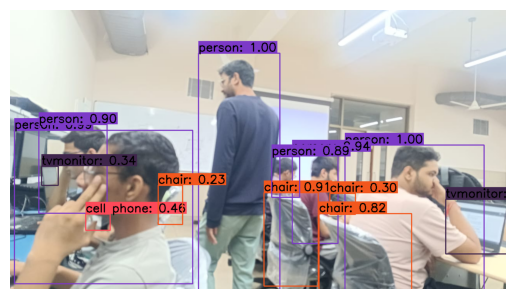

In [48]:
save_path = "results.png"
cv2.imwrite(save_path, img)
print("Saved:", save_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
